###### Exploratory Data Analysis

In [1]:
import numpy as np
import eli5
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import ast
from sklearn.model_selection import train_test_split
from collections import Counter
import wordcloud
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [2]:
data=r'C:\Users\bhardwaj\Downloads\tmdb-box-office-prediction\dataframe1.csv'

In [3]:
df=pd.read_csv(data)

In [4]:
df.set_index('id',inplace=True)

In [5]:
df['log_revenue']=np.log1p(df['revenue'])

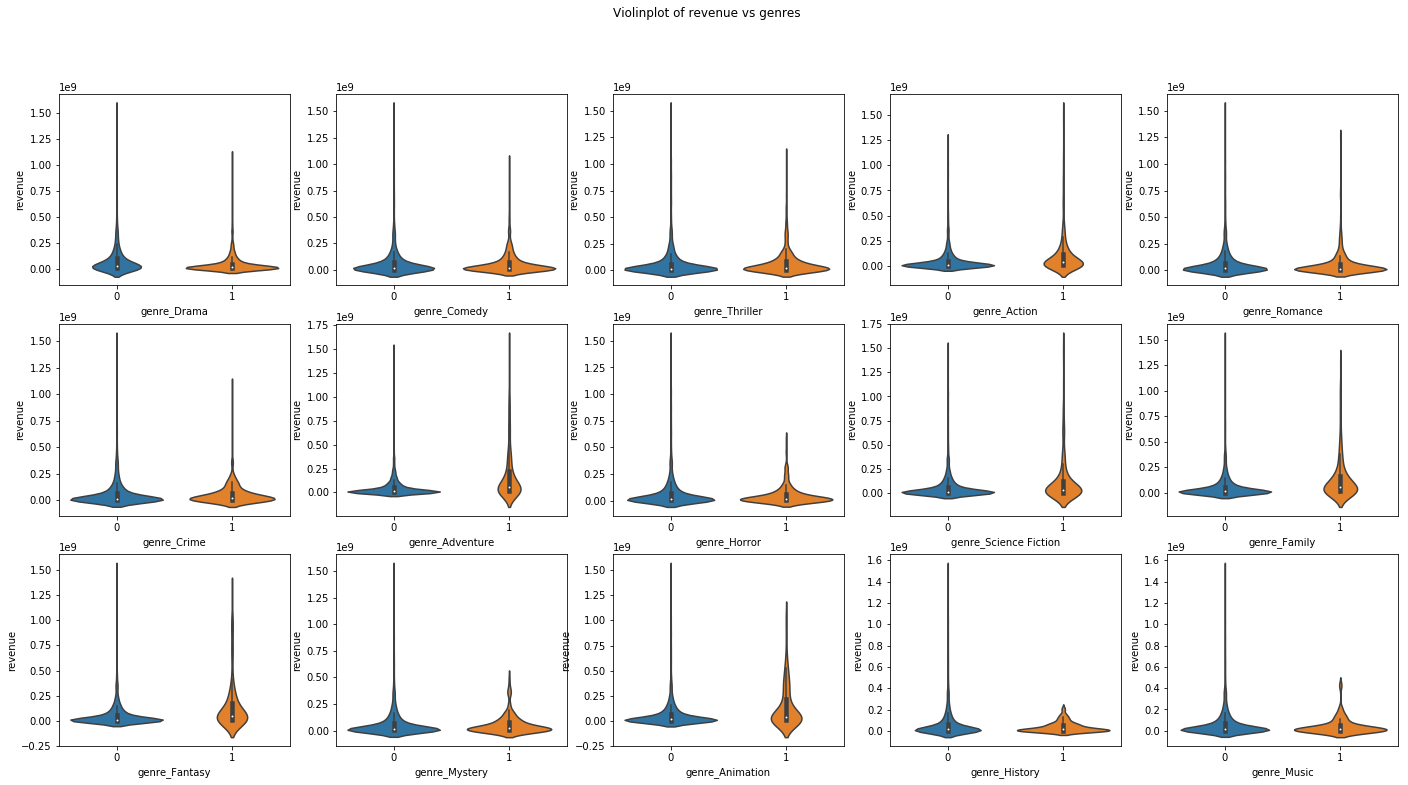

In [6]:
f, axes = plt.subplots(3, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs genres')
for i, e in enumerate([col for col in df.columns if 'genre_' in col]):
    sns.violinplot(x=e, y='revenue', data=df, ax=axes[i // 5][i % 5]);

Some genres tend to have less revenue, some tend to have higher.

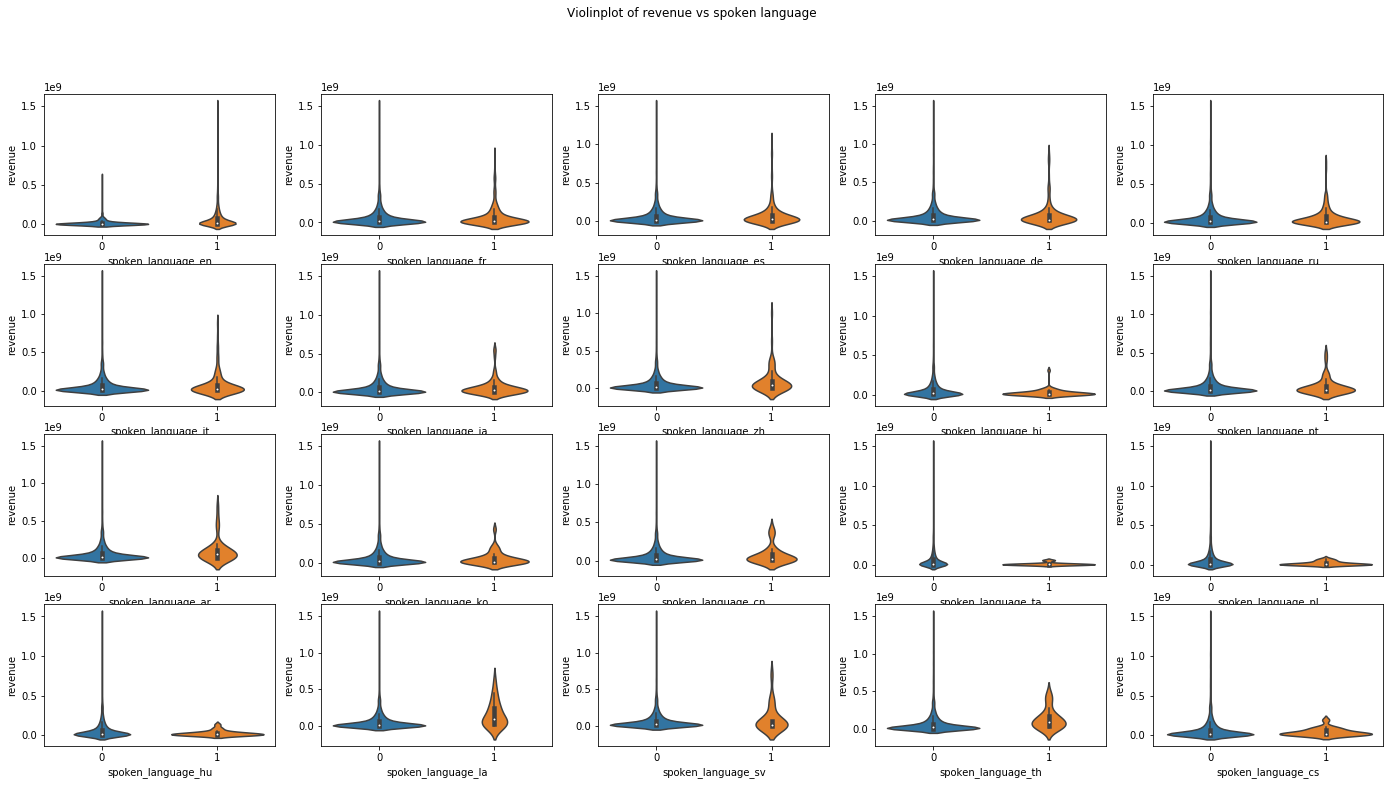

In [7]:
f, axes = plt.subplots(4, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs spoken language')
for i, e in enumerate([col for col in df.columns if 'spoken_language_' in col]):
    sns.violinplot(x=e, y='revenue', data=df, ax=axes[i // 5][i % 5]);

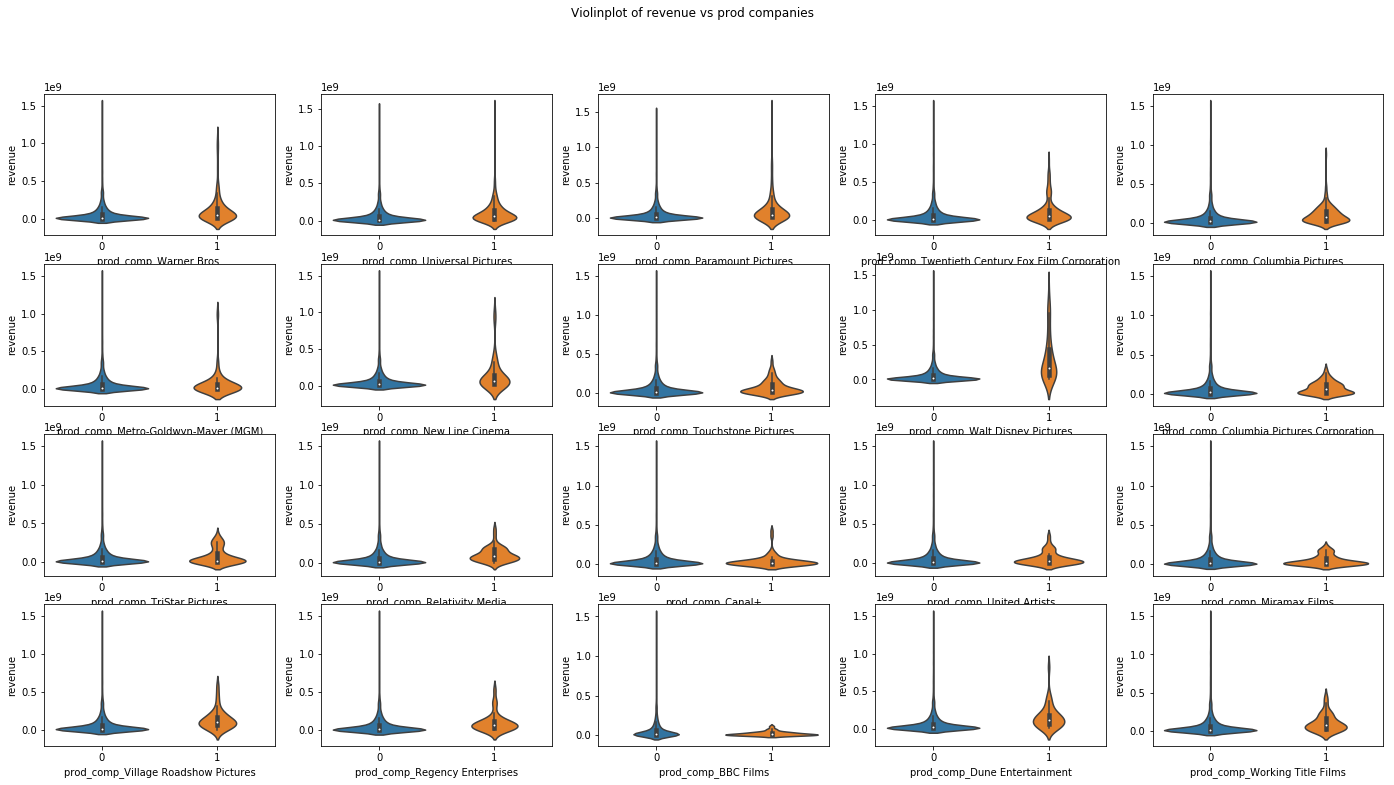

In [8]:
f, axes = plt.subplots(4, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs prod companies')
for i, e in enumerate([col for col in df.columns if 'prod_comp_' in col]):
    sns.violinplot(x=e, y='revenue', data=df, ax=axes[i // 5][i % 5]);

Similarly, revenue for some companies higher than others.

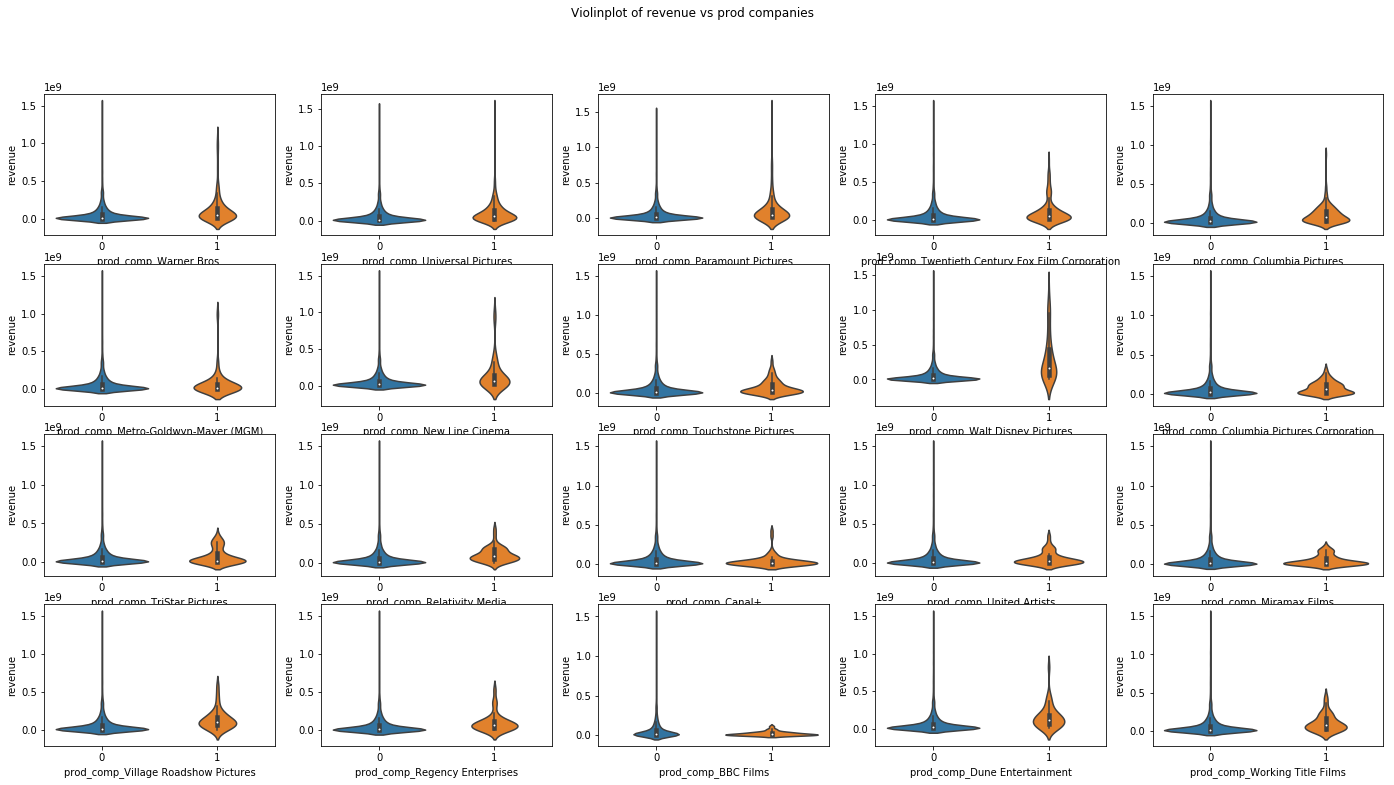

In [9]:
f, axes = plt.subplots(4, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs prod companies')
for i, e in enumerate([col for col in df.columns if 'prod_comp_' in col]):
    sns.violinplot(x=e, y='revenue', data=df, ax=axes[i // 5][i % 5]);

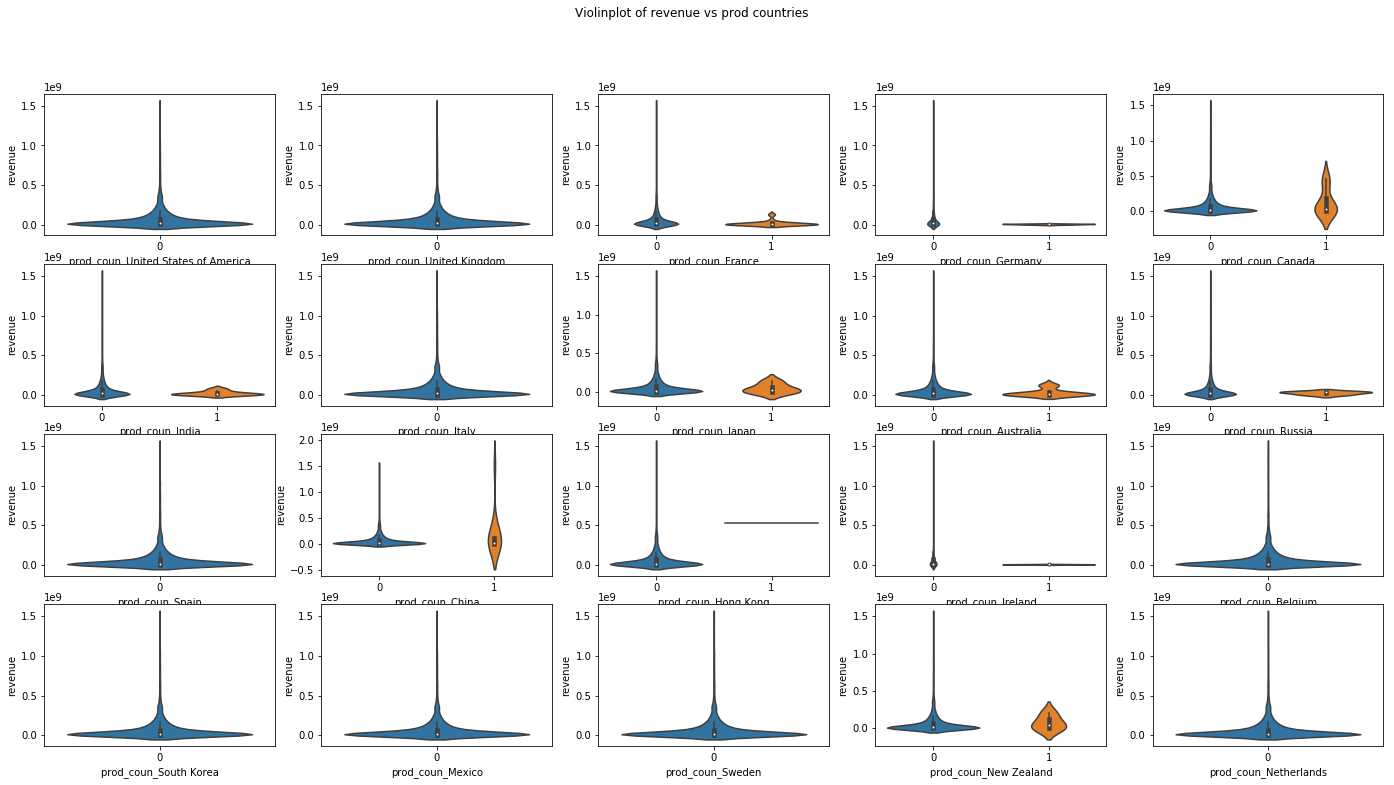

In [10]:
f, axes = plt.subplots(4, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs prod countries')
for i, e in enumerate([col for col in df.columns if 'prod_coun_' in col]):
    sns.violinplot(x=e, y='revenue', data=df, ax=axes[i // 5][i % 5]);

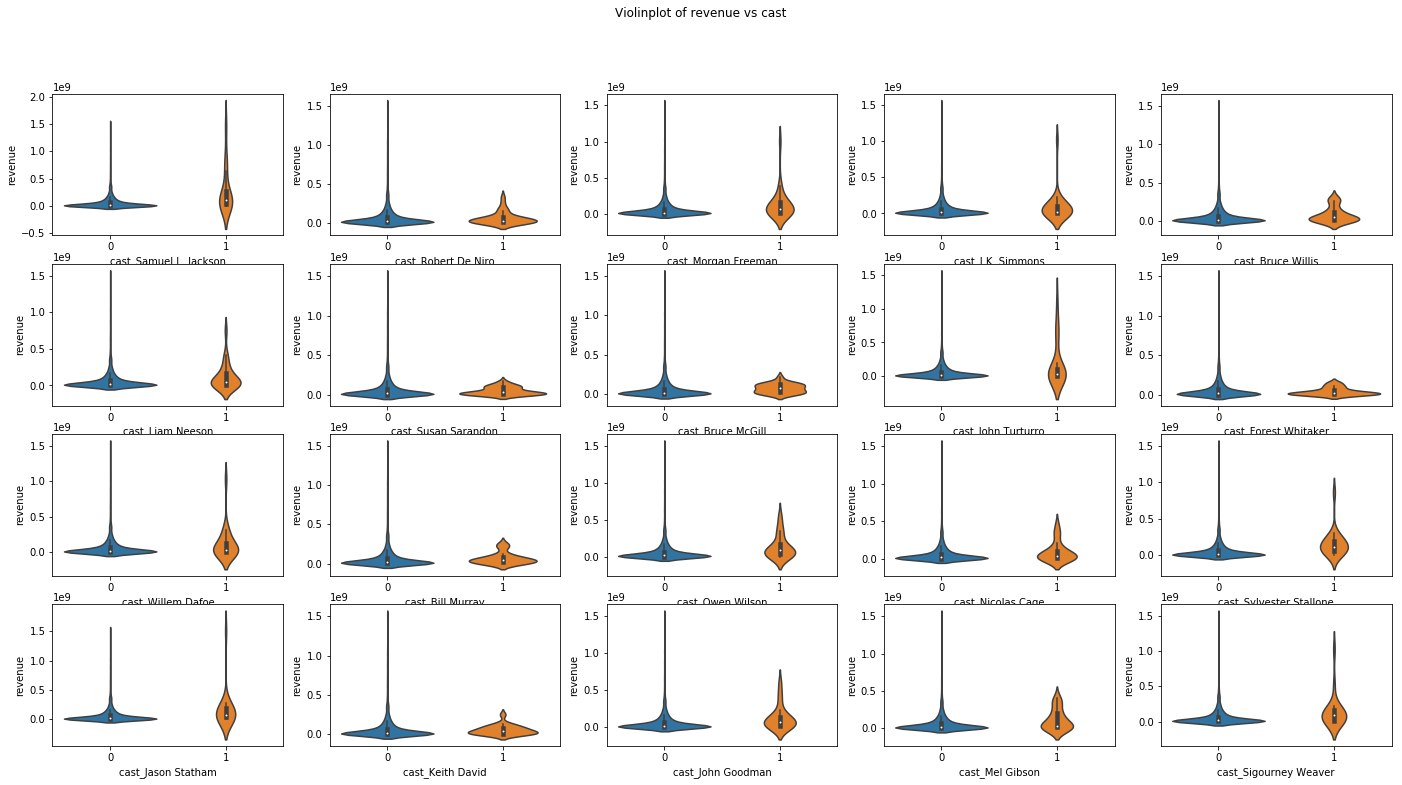

In [11]:
f, axes = plt.subplots(4, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs cast')
for i, e in enumerate([col for col in df.columns if 'cast_' in col]):
    sns.violinplot(x=e, y='revenue', data=df, ax=axes[i // 5][i % 5]);

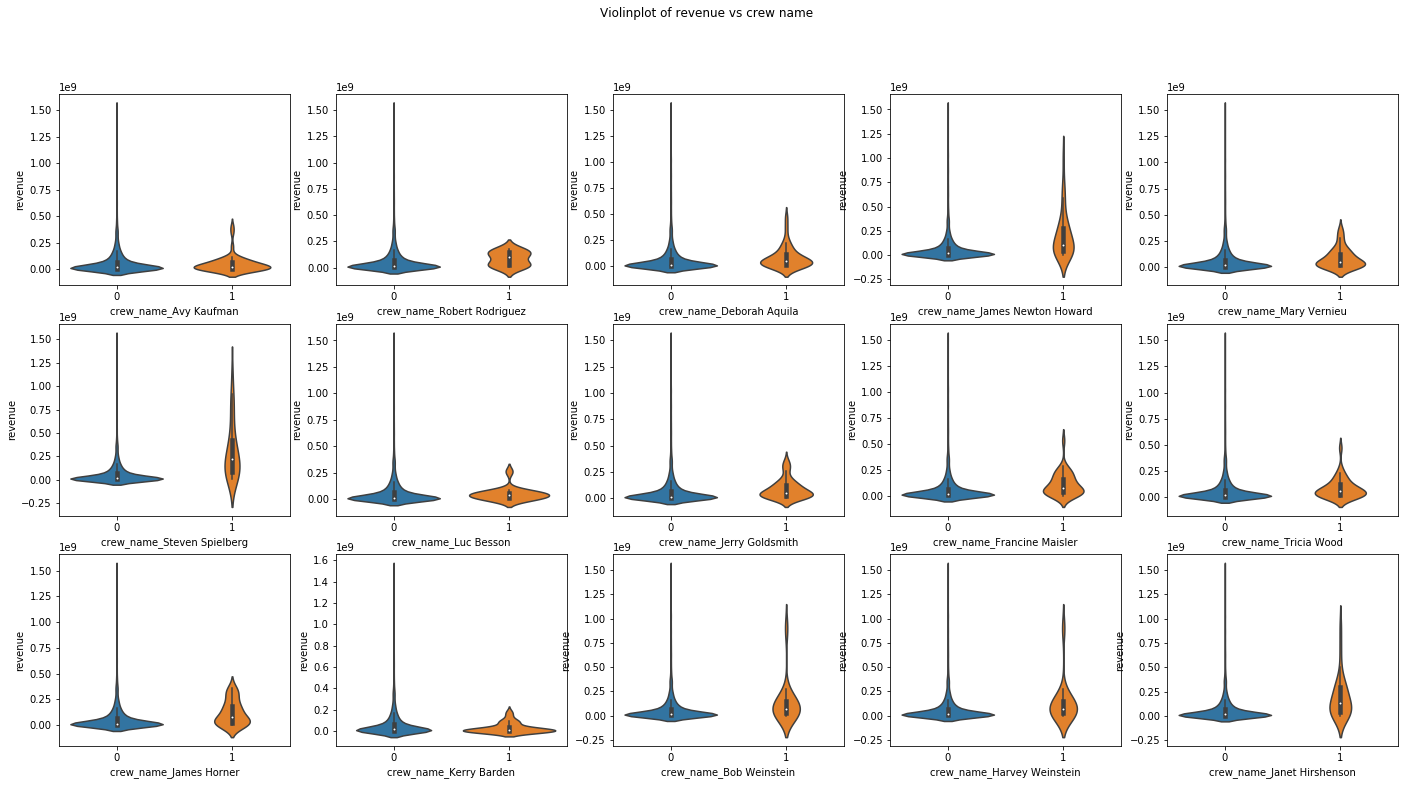

In [12]:
f, axes = plt.subplots(3, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs crew name')
for i, e in enumerate([col for col in df.columns if 'crew_name_' in col]):
    sns.violinplot(x=e, y='revenue', data=df, ax=axes[i // 5][i % 5]);

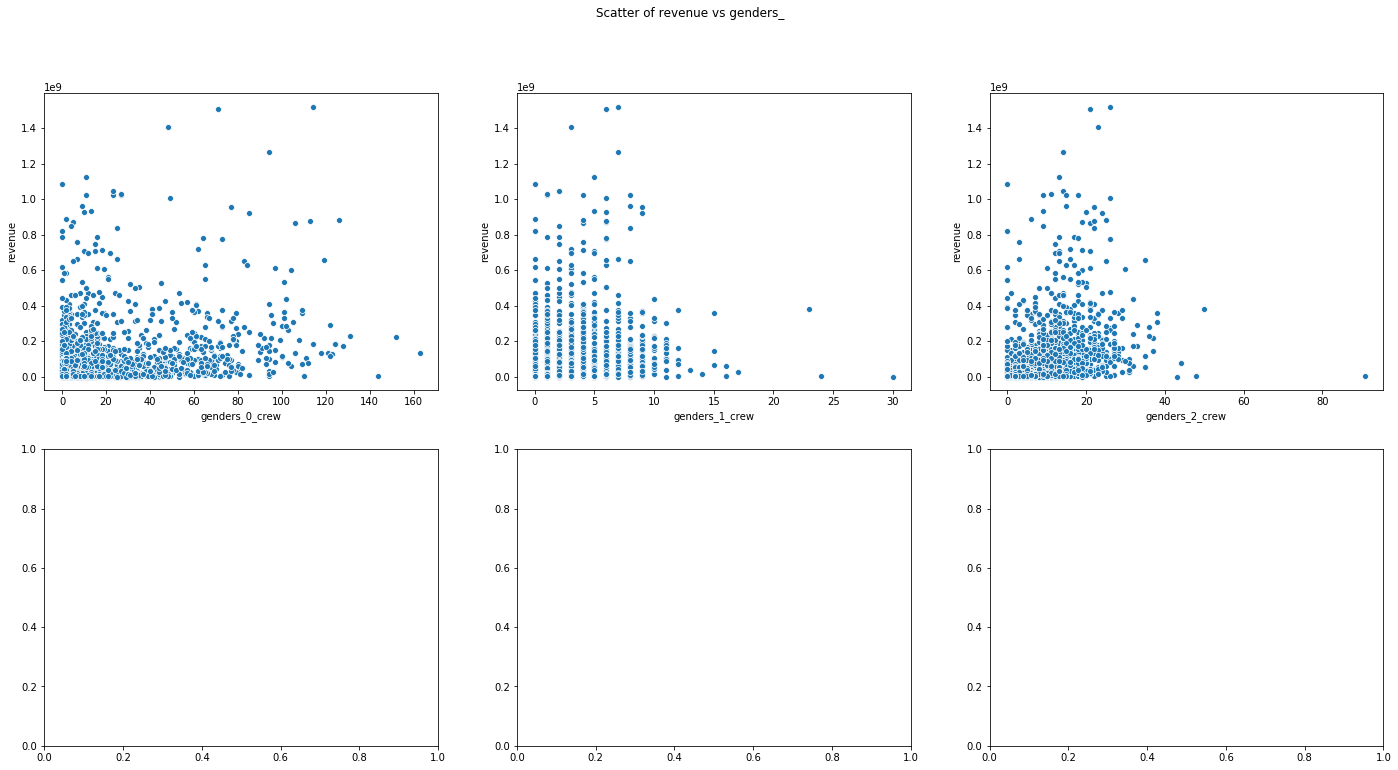

In [13]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))
plt.suptitle('Scatter of revenue vs genders_ ')
for i, e in enumerate([col for col in df.columns if 'genders_' in col]):
    sns.scatterplot(x=e, y='revenue', data=df, ax=axes[i // 5][i % 5]);

It seems for gender_2_crew, revenue actually decreases with increase in this gender population in crew.

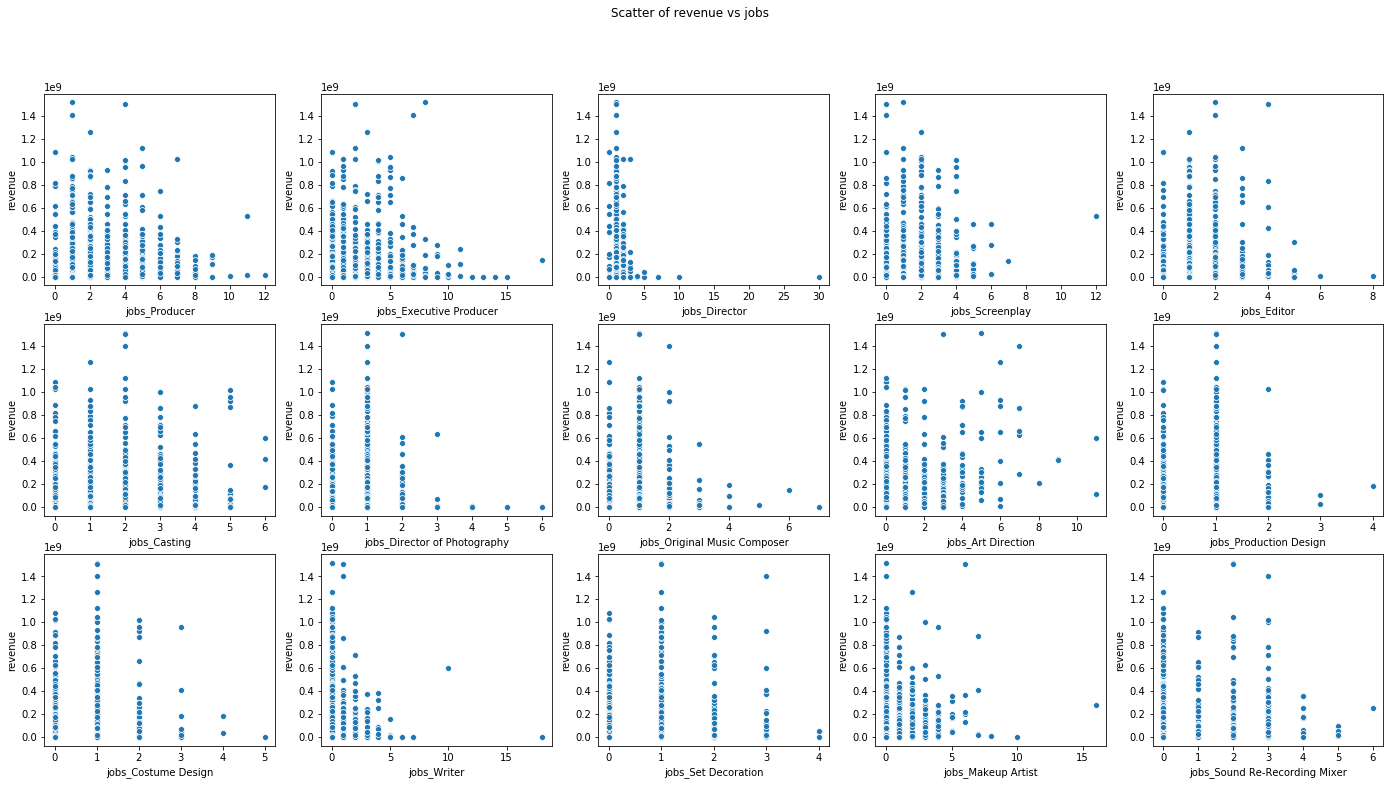

In [14]:
f, axes = plt.subplots(3, 5, figsize=(24, 12))
plt.suptitle('Scatter of revenue vs jobs ')
for i, e in enumerate([col for col in df.columns if 'jobs_' in col]):
    sns.scatterplot(x=e, y='revenue', data=df, ax=axes[i // 5][i % 5]);

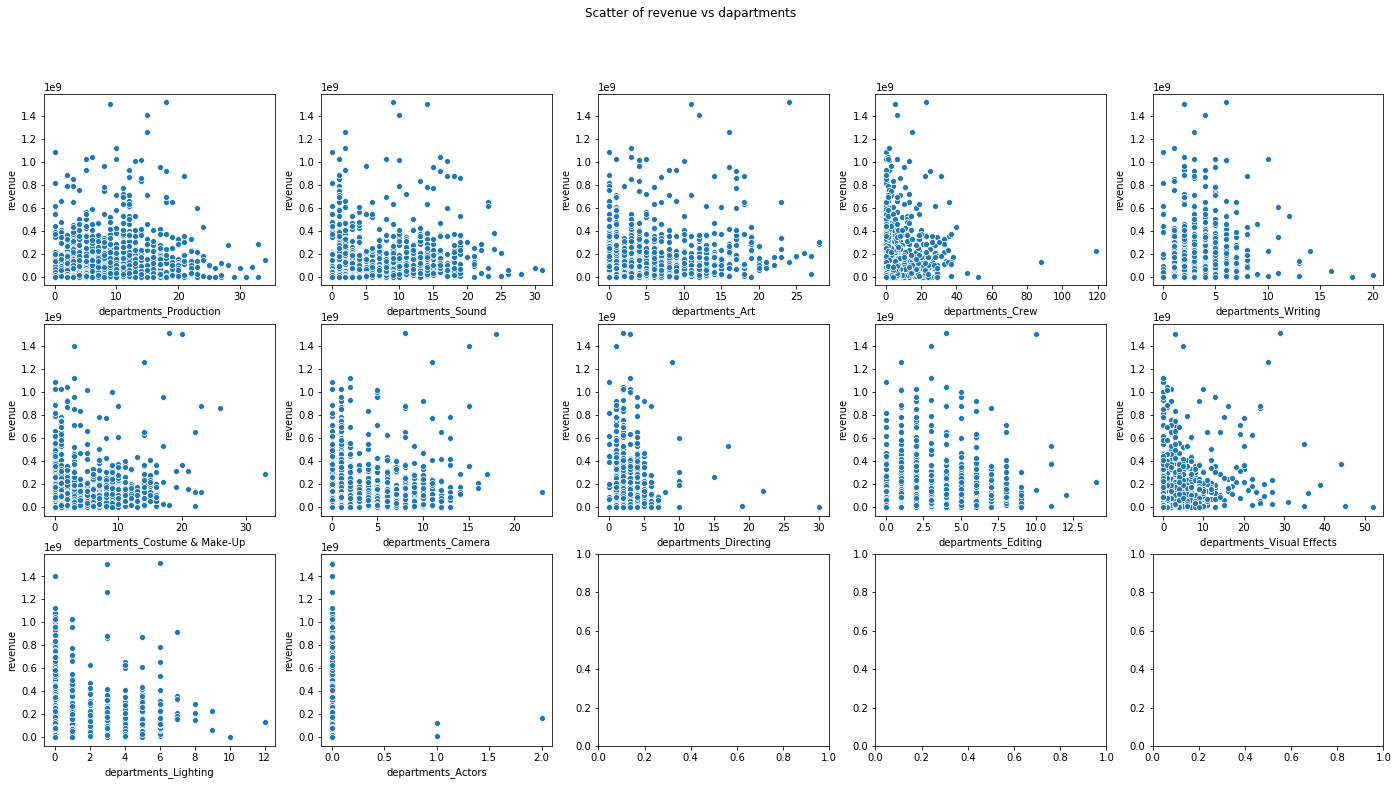

In [15]:
f, axes = plt.subplots(3, 5, figsize=(24, 12))
plt.suptitle('Scatter of revenue vs dapartments ')
for i, e in enumerate([col for col in df.columns if 'departments_' in col]):
    sns.scatterplot(x=e, y='revenue', data=df, ax=axes[i // 5][i % 5]);

For some department, revenue increases with increase in number of crew members in that department where as for some it falls.

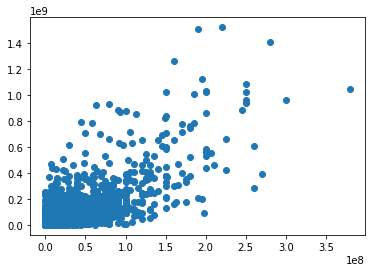

In [16]:
plt.scatter(x='budget',y='revenue',data=df)

Budget and revenue are positively correlated.

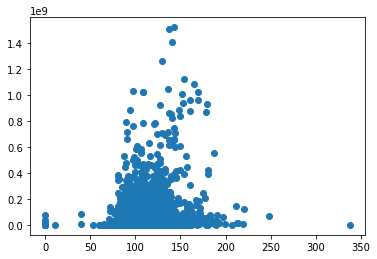

In [17]:
plt.scatter(x='runtime',y='revenue',data=df)

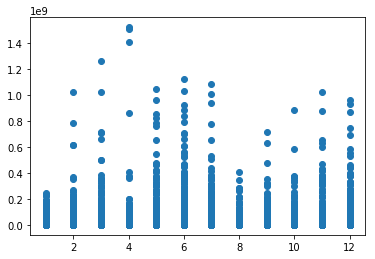

In [18]:
plt.scatter(x='release_month',y='revenue',data=df)

For some months,  revenue is higher than that for others.

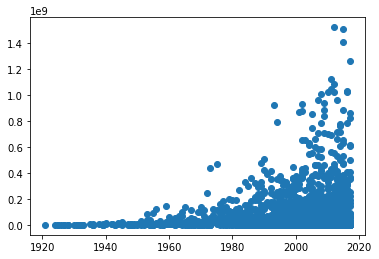

In [19]:
plt.scatter(x='release_year',y='revenue',data=df)

Here, it seems that revenue increases as year progresses. But it can also be because of inflation.

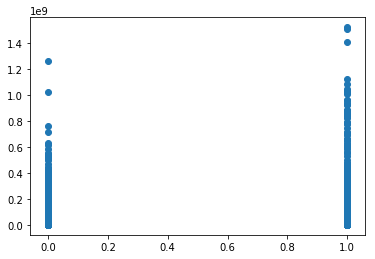

In [20]:
plt.scatter(x='has_collection',y='revenue',data=df)

Movies which belong to collection has higher revenue.

In [21]:
df['log_budget']=np.log1p(df['budget'])

In [22]:
df['log_rev']=np.log1p(df['revenue'])

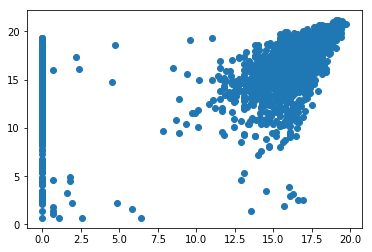

In [23]:
plt.scatter(x='log_budget',y='log_rev',data=df)

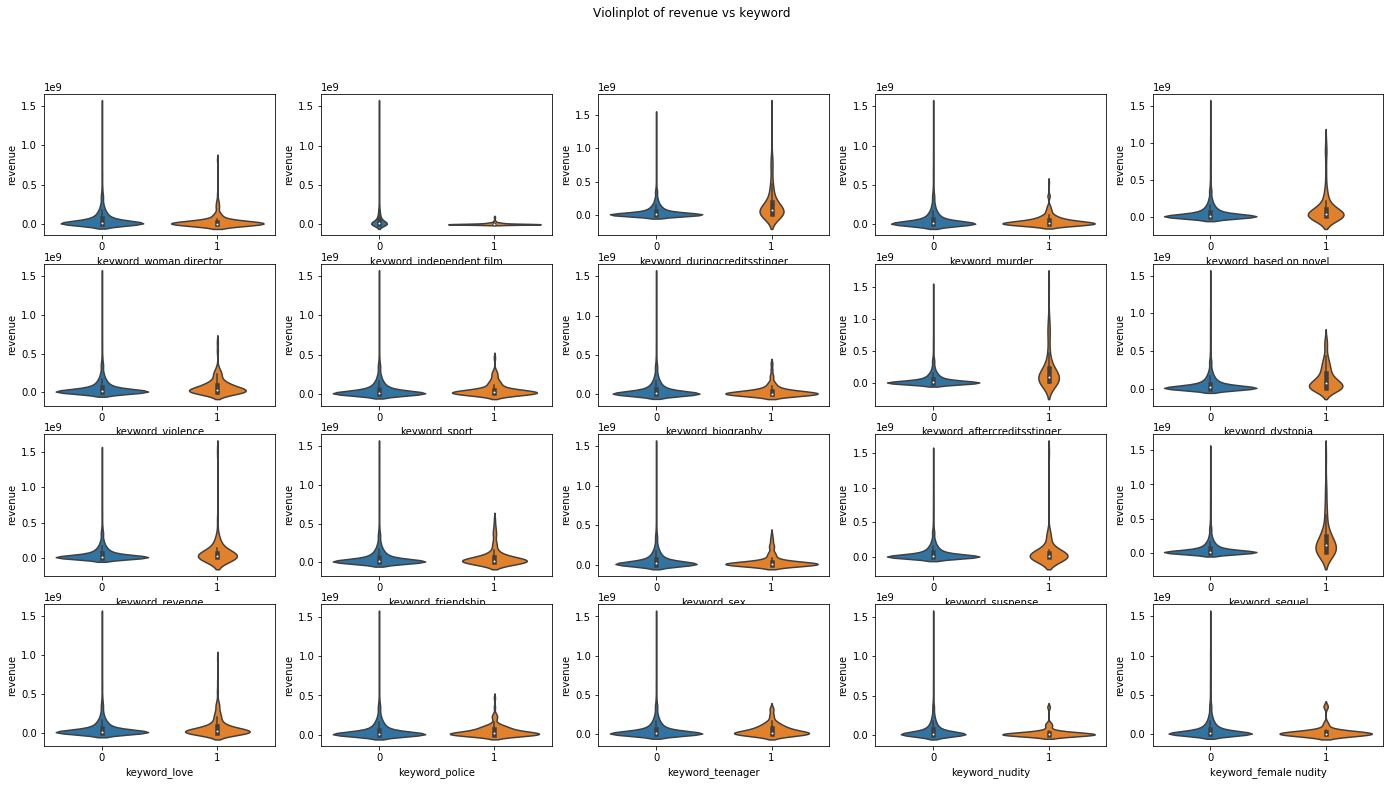

In [24]:
f, axes = plt.subplots(4, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs keyword')
for i, e in enumerate([col for col in df.columns if 'keyword_' in col]):
    sns.violinplot(x=e, y='revenue', data=df, ax=axes[i // 5][i % 5]);

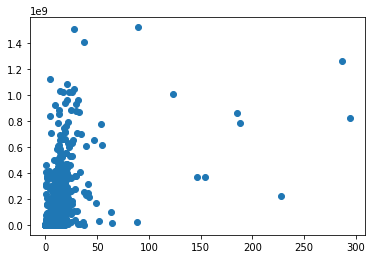

In [25]:
plt.scatter(x='popularity',y='revenue',data=df)

Popularity doesnot seem to affect revenue much.

In [26]:
df['has_homepage'] = 0
df.loc[df['homepage'].isnull() == False, 'has_homepage'] = 1

In [27]:
df['has_homepage'].value_counts()

0    2054
1     946
Name: has_homepage, dtype: int64

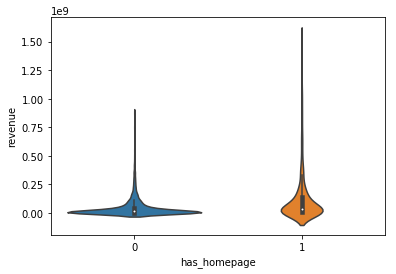

In [28]:
sns.violinplot(x='has_homepage', y='revenue', data=df);

Revenue of movies which have homepage higher than those which donot have that.

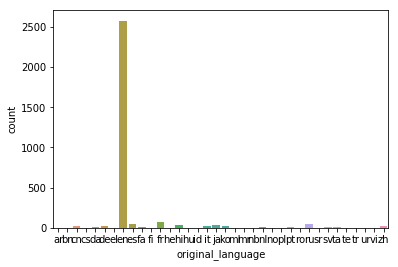

In [29]:
sns.countplot(df['original_language'].sort_values())

Most of the movies are in english.

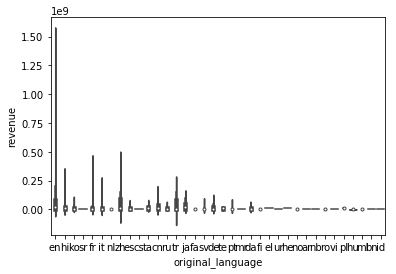

In [30]:
sns.violinplot(x='original_language', y='revenue', data=df);

Revenue for English movies is much higher than all other movies. But revenue for movies in some other languages is also high.